In [1]:
import pandas as pd
import numpy as np

from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from lightgbm import LGBMClassifier
from sklearn.preprocessing import OneHotEncoder
from sklearn.gaussian_process.kernels import RBF
import sys
sys.path.append("/home/leon/projects/gaussian_process/")
from gaussian_process_visualisation import visualise_1D_gaussian_process, visualise_2D_gaussian_process
from gaussian_process_hyperparameter_tuning import optimise_hyperparameters
from sklearn.model_selection import cross_val_score


In [2]:
from gec import GEC
gec = GEC()

In [3]:
path = "/home/leon/learning/gaussian-processes/bank/bank-full.csv"
data = pd.read_csv(path, sep=";")
one_hot_encode = ["job", "marital", "education", "contact", "poutcome", "month"]
binary = ["default", "housing", "loan", "y"]

In [4]:
enc = OneHotEncoder()
def yesNoBinary(column):
    return(pd.DataFrame([1 if value == "yes" else 0 for value in column], columns = [column.name]))
one_hot = pd.DataFrame(enc.fit_transform(data[one_hot_encode]).toarray(), columns=enc.get_feature_names_out(one_hot_encode))
data2 = pd.concat([one_hot] + [ yesNoBinary(data[col]) if col in binary else data[col] for col in data.columns ], 1).drop(one_hot_encode, 1)
X, y = data2.values[:,:-1], data2.values[:,-1]

/tmp/ipykernel_24227/915973979.py:5: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  data2 = pd.concat([one_hot] + [ yesNoBinary(data[col]) if col in binary else data[col] for col in data.columns ], 1).drop(one_hot_encode, 1)
/tmp/ipykernel_24227/915973979.py:5: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  data2 = pd.concat([one_hot] + [ yesNoBinary(data[col]) if col in binary else data[col] for col in data.columns ], 1).drop(one_hot_encode, 1)


In [5]:
gec.fit_model(X, y, 10)

[LightGBM] [Warning] lambda_l1 is set=0.388714740996605, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.388714740996605
[LightGBM] [Warning] boosting is set=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] lambda_l1 is set=0.388714740996605, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.388714740996605
[LightGBM] [Warning] boosting is set=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] lambda_l1 is set=0.388714740996605, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.388714740996605
[LightGBM] [Warning] boosting is set=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] lambda_l1 is set=0.388714740996605, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.388714740996605
[LightGBM] [Warning] boosting is set=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] lambda_l1 is set=0.3887

GEC(boosting='gbdt', lambda_l1=1.0, num_leaves=30)

In [6]:
gec.gec_iter

10

In [7]:
gec.gp_datas["gbdt"][0].shape

(10, 2)

In [8]:
print(gec.best_configuration)
knn_bayes = LGBMClassifier(**gec.best_configuration)
score_bayes = np.mean(cross_val_score(knn_bayes, X, y, cv=5))
score_bayes

{'boosting': 'gbdt', 'lambda_l1': 1.0, 'num_leaves': 30}
[LightGBM] [Warning] lambda_l1 is set=1.0, reg_alpha=0.0 will be ignored. Current value: lambda_l1=1.0
[LightGBM] [Warning] boosting is set=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] lambda_l1 is set=1.0, reg_alpha=0.0 will be ignored. Current value: lambda_l1=1.0
[LightGBM] [Warning] boosting is set=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] lambda_l1 is set=1.0, reg_alpha=0.0 will be ignored. Current value: lambda_l1=1.0
[LightGBM] [Warning] boosting is set=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] lambda_l1 is set=1.0, reg_alpha=0.0 will be ignored. Current value: lambda_l1=1.0
[LightGBM] [Warning] boosting is set=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt


0.6460765411333298

In [9]:
from sklearn.model_selection import RandomizedSearchCV
classifier = LGBMClassifier()
gs = RandomizedSearchCV(classifier, dict(gec.hyperparameters[1]), n_iter=11)
gs.fit(X, y)

[LightGBM] [Warning] lambda_l1 is set=0.49207504881376213, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.49207504881376213
[LightGBM] [Warning] lambda_l1 is set=0.49207504881376213, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.49207504881376213
[LightGBM] [Warning] lambda_l1 is set=0.49207504881376213, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.49207504881376213
[LightGBM] [Warning] lambda_l1 is set=0.49207504881376213, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.49207504881376213
[LightGBM] [Warning] lambda_l1 is set=0.49207504881376213, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.49207504881376213
[LightGBM] [Warning] lambda_l1 is set=0.5210962254464773, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.5210962254464773
[LightGBM] [Warning] lambda_l1 is set=0.5210962254464773, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.5210962254464773
[LightGBM] [Warning] lambda_l1 is set=0.5210962254464773, r

RandomizedSearchCV(estimator=LGBMClassifier(), n_iter=11,
                   param_distributions={'lambda_l1': [0.0, 0.005345903794965073,
                                                      0.01094901577639535,
                                                      0.016821711036271933,
                                                      0.022976960071036508,
                                                      0.029428357428366223,
                                                      0.03619015173223435,
                                                      0.043277277152570855,
                                                      0.05070538638902709,
                                                      0.058490885241692596,
                                                      0.06665096884511756,
                                                      0.07520365964566755,
                                                      0.08416784720608798,
                                                      0.09356332...
                                                      0.1358884980584661,
                                                      0.1477724233905969,
                                                      0.16022812161651678,
                                                      0.17328310252217063,
                                                      0.18696619947552506,
                                                      0.2013076331082478,
                                                      0.21633907806131228,
                                                      0.23209373294194233,
                                                      0.2486063936464049,
                                                      0.265913530210592,
                                                      0.2840533673581254,
                                                      0.3030659689238822,
                                                      0.32299332633940186, ...],
                                        'num_leaves': [10, 11, 12, 13, 14, 15,
                                                       16, 17, 18, 19, 20, 21,
                                                       22, 23, 24, 25, 26, 27,
                                                       28, 29, 30, 31, 32, 33,
                                                       34, 35, 36, 37, 38, 39, ...]})

In [10]:

knn_bayes = LGBMClassifier(**gec.best_configuration)
score_bayes = np.mean(cross_val_score(knn_bayes, X, y, cv=5))

knn_gs = LGBMClassifier(**gs.best_params_)
score_gs = np.mean(cross_val_score(knn_gs, X, y, cv=5))
#score_gs= "None"
knn_default = LGBMClassifier()
score_default = np.mean(cross_val_score(knn_default, X, y, cv=5))
print(f"bayesian: {score_bayes}, random search: {score_gs}, default: {score_default}")


[LightGBM] [Warning] lambda_l1 is set=1.0, reg_alpha=0.0 will be ignored. Current value: lambda_l1=1.0
[LightGBM] [Warning] boosting is set=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] lambda_l1 is set=1.0, reg_alpha=0.0 will be ignored. Current value: lambda_l1=1.0
[LightGBM] [Warning] boosting is set=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] lambda_l1 is set=1.0, reg_alpha=0.0 will be ignored. Current value: lambda_l1=1.0
[LightGBM] [Warning] boosting is set=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] lambda_l1 is set=1.0, reg_alpha=0.0 will be ignored. Current value: lambda_l1=1.0
[LightGBM] [Warning] boosting is set=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] lambda_l1 is set=0.49207504881376213, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.49207504881376213
[LightGBM] [Warning] 

In [11]:
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.utils.extmath import cartesian
from sklearn.gaussian_process.kernels import RBF, ConstantKernel

gaussian = GaussianProcessRegressor(kernel=gec.kernel)
#gaussian.fit(result['uniform'][0], result['uniform'][0].dot(np.array([1.0, 3.0]))/500)
gaussian.fit(gec.gp_datas['gbdt'][0], gec.gp_datas['gbdt'][1])

GaussianProcessRegressor(kernel=RBF(length_scale=1))

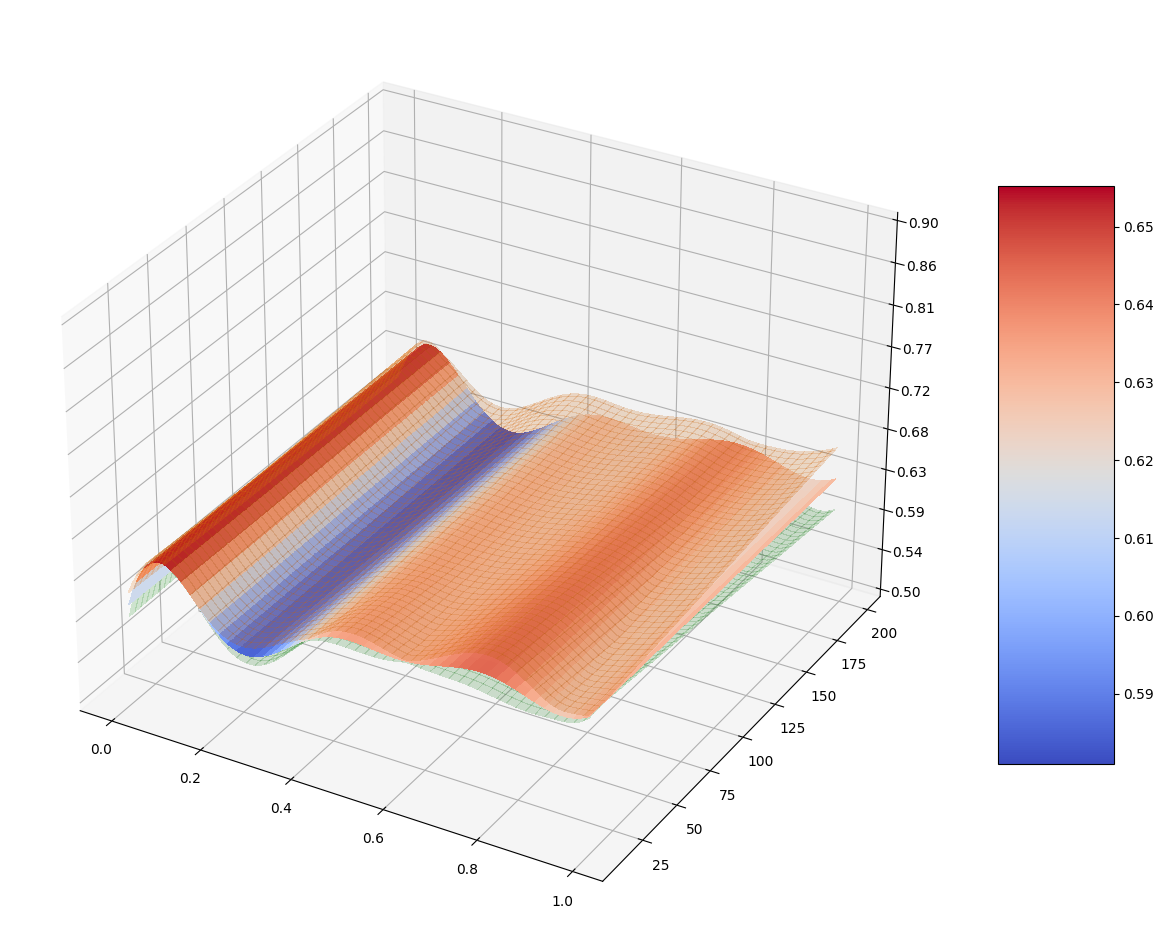

In [12]:
visualise_2D_gaussian_process(gaussian, (np.logspace(0.00, 1, 50) -1)/9, np.arange(10, 200, 1), np.arange(0.5, 1, 0.1))

In [13]:
print(gec.best_configuration)
knn_bayes = LGBMClassifier(**gec.best_configuration)
score_bayes = np.mean(cross_val_score(knn_bayes, X, y, cv=5))
score_bayes

{'boosting': 'gbdt', 'lambda_l1': 1.0, 'num_leaves': 30}
[LightGBM] [Warning] lambda_l1 is set=1.0, reg_alpha=0.0 will be ignored. Current value: lambda_l1=1.0
[LightGBM] [Warning] boosting is set=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] lambda_l1 is set=1.0, reg_alpha=0.0 will be ignored. Current value: lambda_l1=1.0
[LightGBM] [Warning] boosting is set=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] lambda_l1 is set=1.0, reg_alpha=0.0 will be ignored. Current value: lambda_l1=1.0
[LightGBM] [Warning] boosting is set=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] lambda_l1 is set=1.0, reg_alpha=0.0 will be ignored. Current value: lambda_l1=1.0
[LightGBM] [Warning] boosting is set=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] lambda_l1 is set=1.0, reg_alpha=0.0 will be ignored. Current value: lambda_l1=

0.6460765411333298

In [17]:
knn_bayes = LGBMClassifier(**{'boosting': 'gbdt', 'lambda_l1': 0., 'num_leaves': 12})
score_bayes = np.mean(cross_val_score(knn_bayes, X, y, cv=5))
score_bayes

[LightGBM] [Warning] lambda_l1 is set=0.1, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.1
[LightGBM] [Warning] boosting is set=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] lambda_l1 is set=0.1, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.1
[LightGBM] [Warning] boosting is set=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] lambda_l1 is set=0.1, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.1
[LightGBM] [Warning] boosting is set=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] lambda_l1 is set=0.1, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.1
[LightGBM] [Warning] boosting is set=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] lambda_l1 is set=0.1, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.1
[LightGBM] [Warning] boosting is set=gbdt, boosting_t

0.6575563609516555